In [25]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy.stats import chi2_contingency


from itertools import product

In [2]:
file_path = r'C:\Users\Klime\OneDrive\Documents\NOVA IMS\Machine Learning\Project\project_data\train_data.csv'
df = pd.read_csv(file_path)
df.head()

C:\Users\klime\AppData\Local\Temp\ipykernel_14420\3272598199.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


## Sanity Check


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [4]:
df.shape

(593471, 33)

In [5]:
df.isnull().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [6]:
df.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Accident Date,2019-12-30,2019-08-30,2019-12-06,NaN,2019-12-30,2019-12-26,2019-12-28,2019-12-30,2019-12-23,2019-12-29,...,2019-12-28,2019-11-07,NaN,2019-12-26,2019-12-24,2019-12-07,2019-12-28,2019-12-18,2019-12-14,2019-12-19
Age at Injury,31.0,46.0,40.0,NaN,61.0,67.0,48.0,33.0,55.0,20.0,...,18.0,58.0,NaN,24.0,55.0,55.0,45.0,53.0,24.0,52.0
Alternative Dispute Resolution,N,N,N,NaN,N,N,N,N,N,N,...,N,N,NaN,N,N,N,N,N,N,N
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,...,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
Attorney/Representative,N,Y,N,NaN,N,N,N,N,N,N,...,N,N,NaN,N,Y,N,N,N,N,N
Average Weekly Wage,0.0,1745.93,1434.8,NaN,NaN,0.0,0.0,0.0,0.0,225.0,...,0.0,0.0,NaN,0.0,2011.51,0.0,0.0,0.0,0.0,0.0
Birth Year,1988.0,1973.0,1979.0,NaN,1958.0,1952.0,1971.0,1986.0,1964.0,NaN,...,2001.0,1961.0,NaN,1995.0,1964.0,1964.0,1974.0,0.0,1995.0,1967.0
C-2 Date,2019-12-31,2020-01-01,2020-01-01,NaN,2019-12-31,2019-12-31,2019-12-31,2019-12-31,2020-01-01,2019-12-31,...,2019-12-31,2019-12-31,NaN,2020-01-01,2019-12-31,2020-01-01,2019-12-31,2020-01-01,2020-01-01,2019-12-31
C-3 Date,NaN,2020-01-14,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,...,NaN,NaN,NaN,2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO,INDEMNITY INSURANCE CO OF,NaN,STATE INSURANCE FUND,INDEMNITY INS. OF N AMERICA,LM INSURANCE CORP,STATE INSURANCE FUND,"ROCHESTER, UNIVERSITY OF",LM INSURANCE CORP,...,NEW HAMPSHIRE INSURANCE CO,INDEMNITY INS. OF N AMERICA,NaN,"BATH & BODY WORKS, INC.",LM INSURANCE CORP,AMERICAN ZURICH INSURANCE CO,NEW HAMPSHIRE INSURANCE CO,TWIN CITY FIRE INS CO.,INDEMNITY INS. OF N AMERICA,SELECTIVE INSURANCE CO OF NY


### Remove Duplicates

In [7]:
df["Claim Identifier"].unique().shape

(593470,)

In [8]:
dubles = df["Claim Identifier"].value_counts()
dubles = dubles[dubles > 1]
dubles = dubles.index
dubles

Index([292668076], dtype='int64', name='Claim Identifier')

In [9]:
duplicates = df[df.duplicated(subset=['Claim Identifier'], keep="first")]
df = df.drop(duplicates.index)

print(f'Dropped {len(duplicates)} rows with duplicated Claim Identifier')

Dropped 1 rows with duplicated Claim Identifier


### Removing Rows with NaNs > 70%

In [10]:
threshold = int(df.shape[1] * 0.7)
rows_with_70_percent_nans = df[df.isnull().sum(axis=1) >= threshold]
num_rows = rows_with_70_percent_nans.shape[0]
print(f'There are {num_rows} rows with 70% or more NaN values.')

There are 19444 rows with 70% or more NaN values.


In [11]:
df1= df.dropna(thresh=df.shape[1] - threshold).copy()
num_rows_dropped = df.shape[0] - df1.shape[0]
print(f'We dropped {num_rows_dropped} rows with 70% or more NaN values.')

We dropped 19444 rows with 70% or more NaN values.


In [12]:
df1 = df1.set_index("Claim Identifier")

In [13]:
df1.isnull().sum()/df1.shape[0]*100

Accident Date                           0.642654
Age at Injury                           0.000000
Alternative Dispute Resolution          0.000000
Assembly Date                           0.000000
Attorney/Representative                 0.000000
Average Weekly Wage                     4.991237
Birth Year                              5.065624
C-2 Date                                2.536470
C-3 Date                               67.380397
Carrier Name                            0.000000
Carrier Type                            0.000000
Claim Injury Type                       0.000000
County of Injury                        0.000000
COVID-19 Indicator                      0.000000
District Name                           0.000000
First Hearing Date                     73.729761
Gender                                  0.000000
IME-4 Count                            76.864637
Industry Code                           1.734765
Industry Code Description               1.734765
Medical Fee Region  

In [14]:
df1.drop(columns = "OIICS Nature of Injury Description", inplace=True)
#What do we do with "IME-4 Count ", "First Hearing Date", "C-3 Date"; all have NaNs > 50% ??

In [15]:
#Identify garbage value
for i in df1.select_dtypes(include = "object").columns:
    print(df1[i].value_counts())
    print("***"*10)

#no garbage values 

Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64
******************************
Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64
******************************
Assembly Date
2020-03-06    1413
2021-05-11    1370
2022-04-01    1233
2022-02-04    1194
2022-08-15    1151
              ... 
2020-12-05       1
2020-12-12       1
2021-03-20       1
2021-01-09       1
2020-09-05       1
Name: count, Length: 897, dtype: int64
******************************
Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64
******************************
C-2 Date
2021-05-11    1847
2020-03-05    1348
2021-05-27    1271
2022-08-15    1134
2021-06-22    1081
              ... 
2006-06-26       1
1998-10-30       1
2004-03-03       1
2011

In [16]:
df1.dtypes

Accident Date                         object
Age at Injury                        float64
Alternative Dispute Resolution        object
Assembly Date                         object
Attorney/Representative               object
Average Weekly Wage                  float64
Birth Year                           float64
C-2 Date                              object
C-3 Date                              object
Carrier Name                          object
Carrier Type                          object
Claim Injury Type                     object
County of Injury                      object
COVID-19 Indicator                    object
District Name                         object
First Hearing Date                    object
Gender                                object
IME-4 Count                          float64
Industry Code                        float64
Industry Code Description             object
Medical Fee Region                    object
WCIO Cause of Injury Code            float64
WCIO Cause

In [61]:
zeros_in_wage = (df1["Average Weekly Wage"]== 0).sum()
zeros_in_wage

335450

## Exploratory Analysis 

In [17]:
numerical_col = ["Age at Injury","Average Weekly Wage", "Birth Year", "IME-4 Count", "Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code" , "Agreement Reached", "Number of Dependents"]
non_numerical_col = [ col for col in df1.columns if col not in numerical_col]

len(numerical_col)


10

In [18]:
df1.head(20)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
5393848,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
5394182,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
5393881,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
5394084,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


In [19]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0
Number of Dependents,574026.0,3.006559,2.000801,0.0,1.0,3.0,5.0,6.0


In [20]:
df1["Age at Injury"].value_counts()

Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     13657
51.0     13486
         ...  
115.0        1
5.0          1
104.0        1
113.0        1
114.0        1
Name: count, Length: 108, dtype: int64

In [21]:
df1["WCIO Cause of Injury Code"].value_counts()

WCIO Cause of Injury Code
56.0    46610
74.0    37153
60.0    33192
31.0    31733
29.0    29364
        ...  
91.0       55
14.0       51
40.0       45
8.0        34
47.0       12
Name: count, Length: 77, dtype: int64

In [22]:
df1.describe(include = "object").T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,574026,897,2020-03-06,1413
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [23]:
target_variable= df1["Claim Injury Type"].value_counts().sum()
percentage_tvariable = df1["Claim Injury Type"].value_counts()/target_variable
percentage_tvariable

Claim Injury Type
2. NON-COMP        0.507082
4. TEMPORARY       0.258711
3. MED ONLY        0.120040
5. PPD SCH LOSS    0.084108
1. CANCELLED       0.021736
6. PPD NSL         0.007336
8. DEATH           0.000819
7. PTD             0.000169
Name: count, dtype: float64

Having 50% of the labeled data from one class can create pootential problems. Bias towards the majority class and poor generalization to minority classes are one of them.

## Numeric Variables

Text(0.5, 0.98, "Numeric Variables' Histograms")

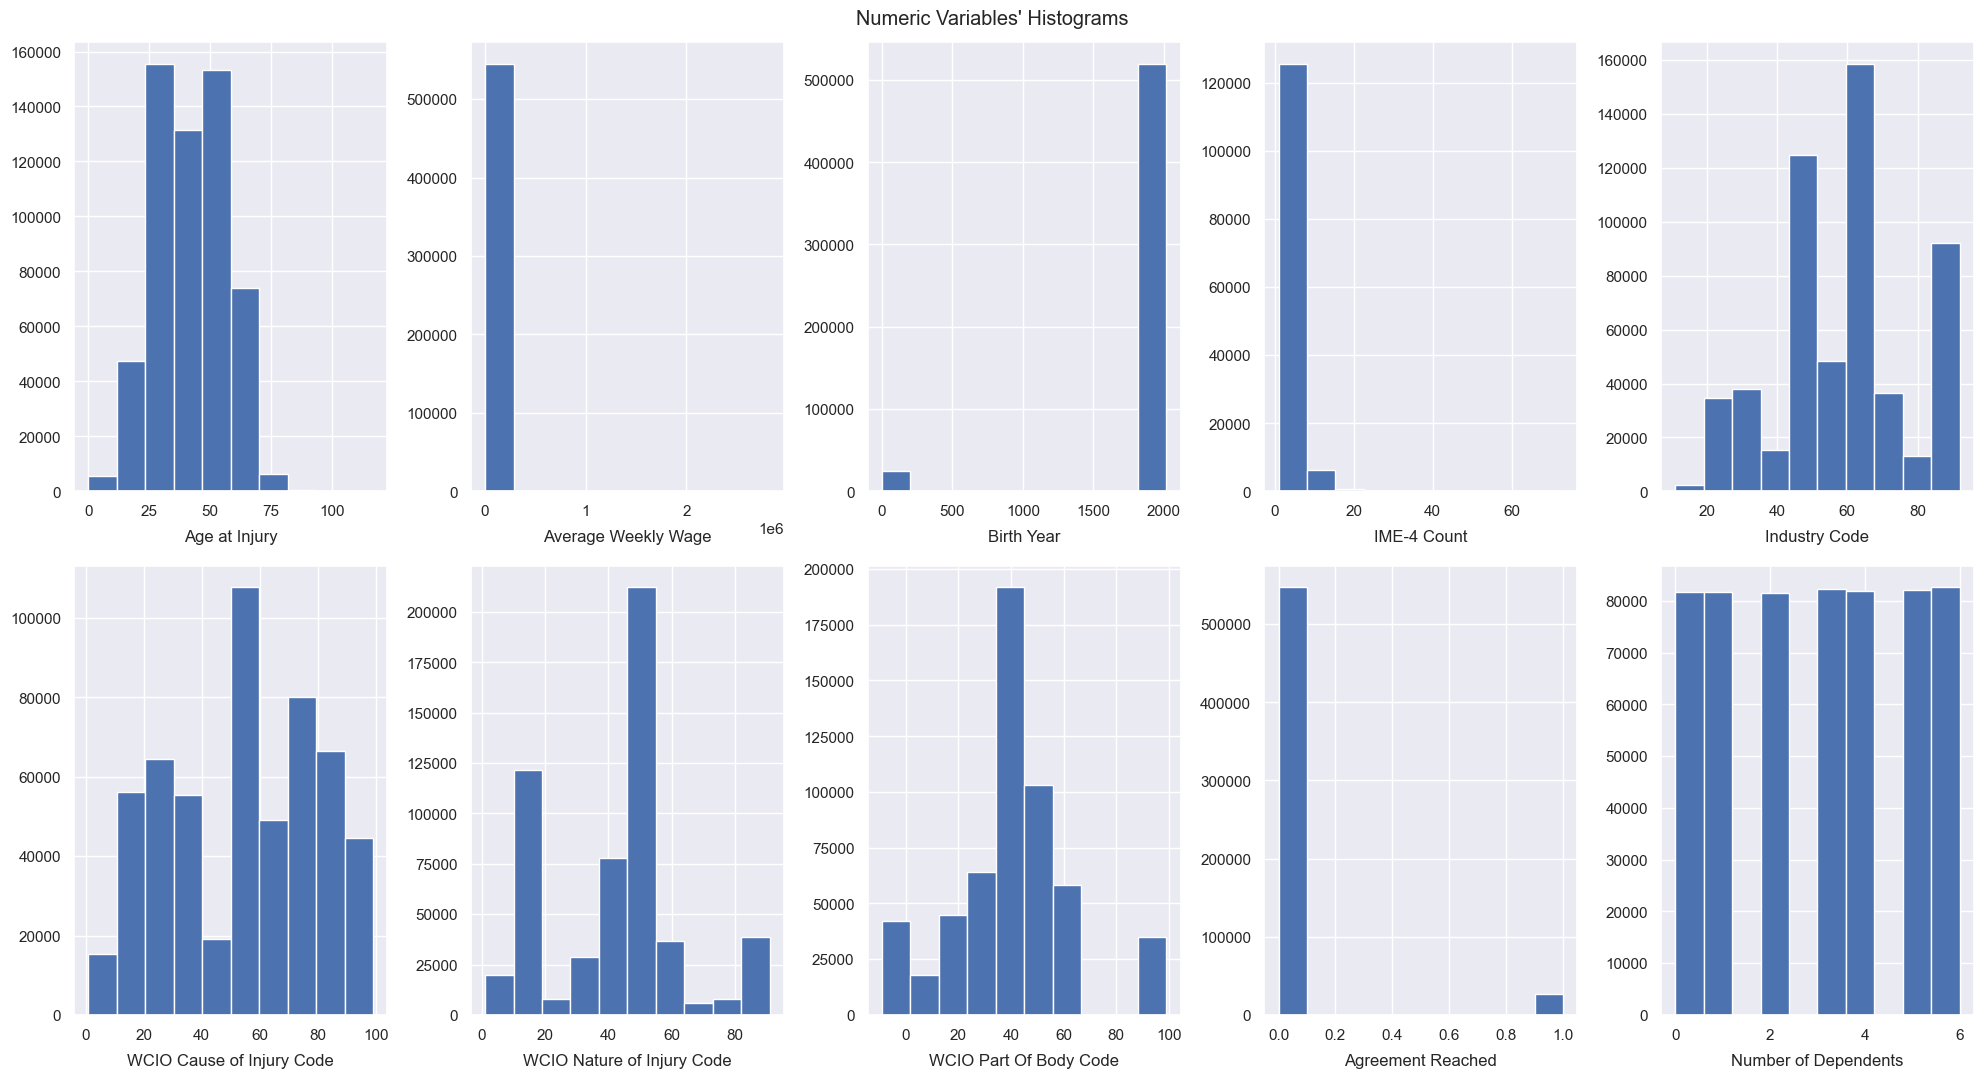

In [24]:
sns.set()

hist_rows = 2
hist_cols = 5

fig, axes = plt.subplots(hist_rows,
                         hist_cols,
                         figsize = (20,11),
                         tight_layout = True
                        )

for ax, feat in zip(axes.flatten(), numerical_col):
    ax.hist(df1[feat])
    ax.set_title(feat, y=-0.13)

title = "Numeric Variables' Histograms"

plt.suptitle(title)


The applicant age ranges from 1 to 117, whoever the most prevelant one we have is from 25-31 and from 49-60  #Box plot? 
Average weekly wage we have a lot of unknows. Can we asssume the the minimal wage since all should be employed? 

Number of dependents pretty evenly distributed?
Different graph for the codes? 


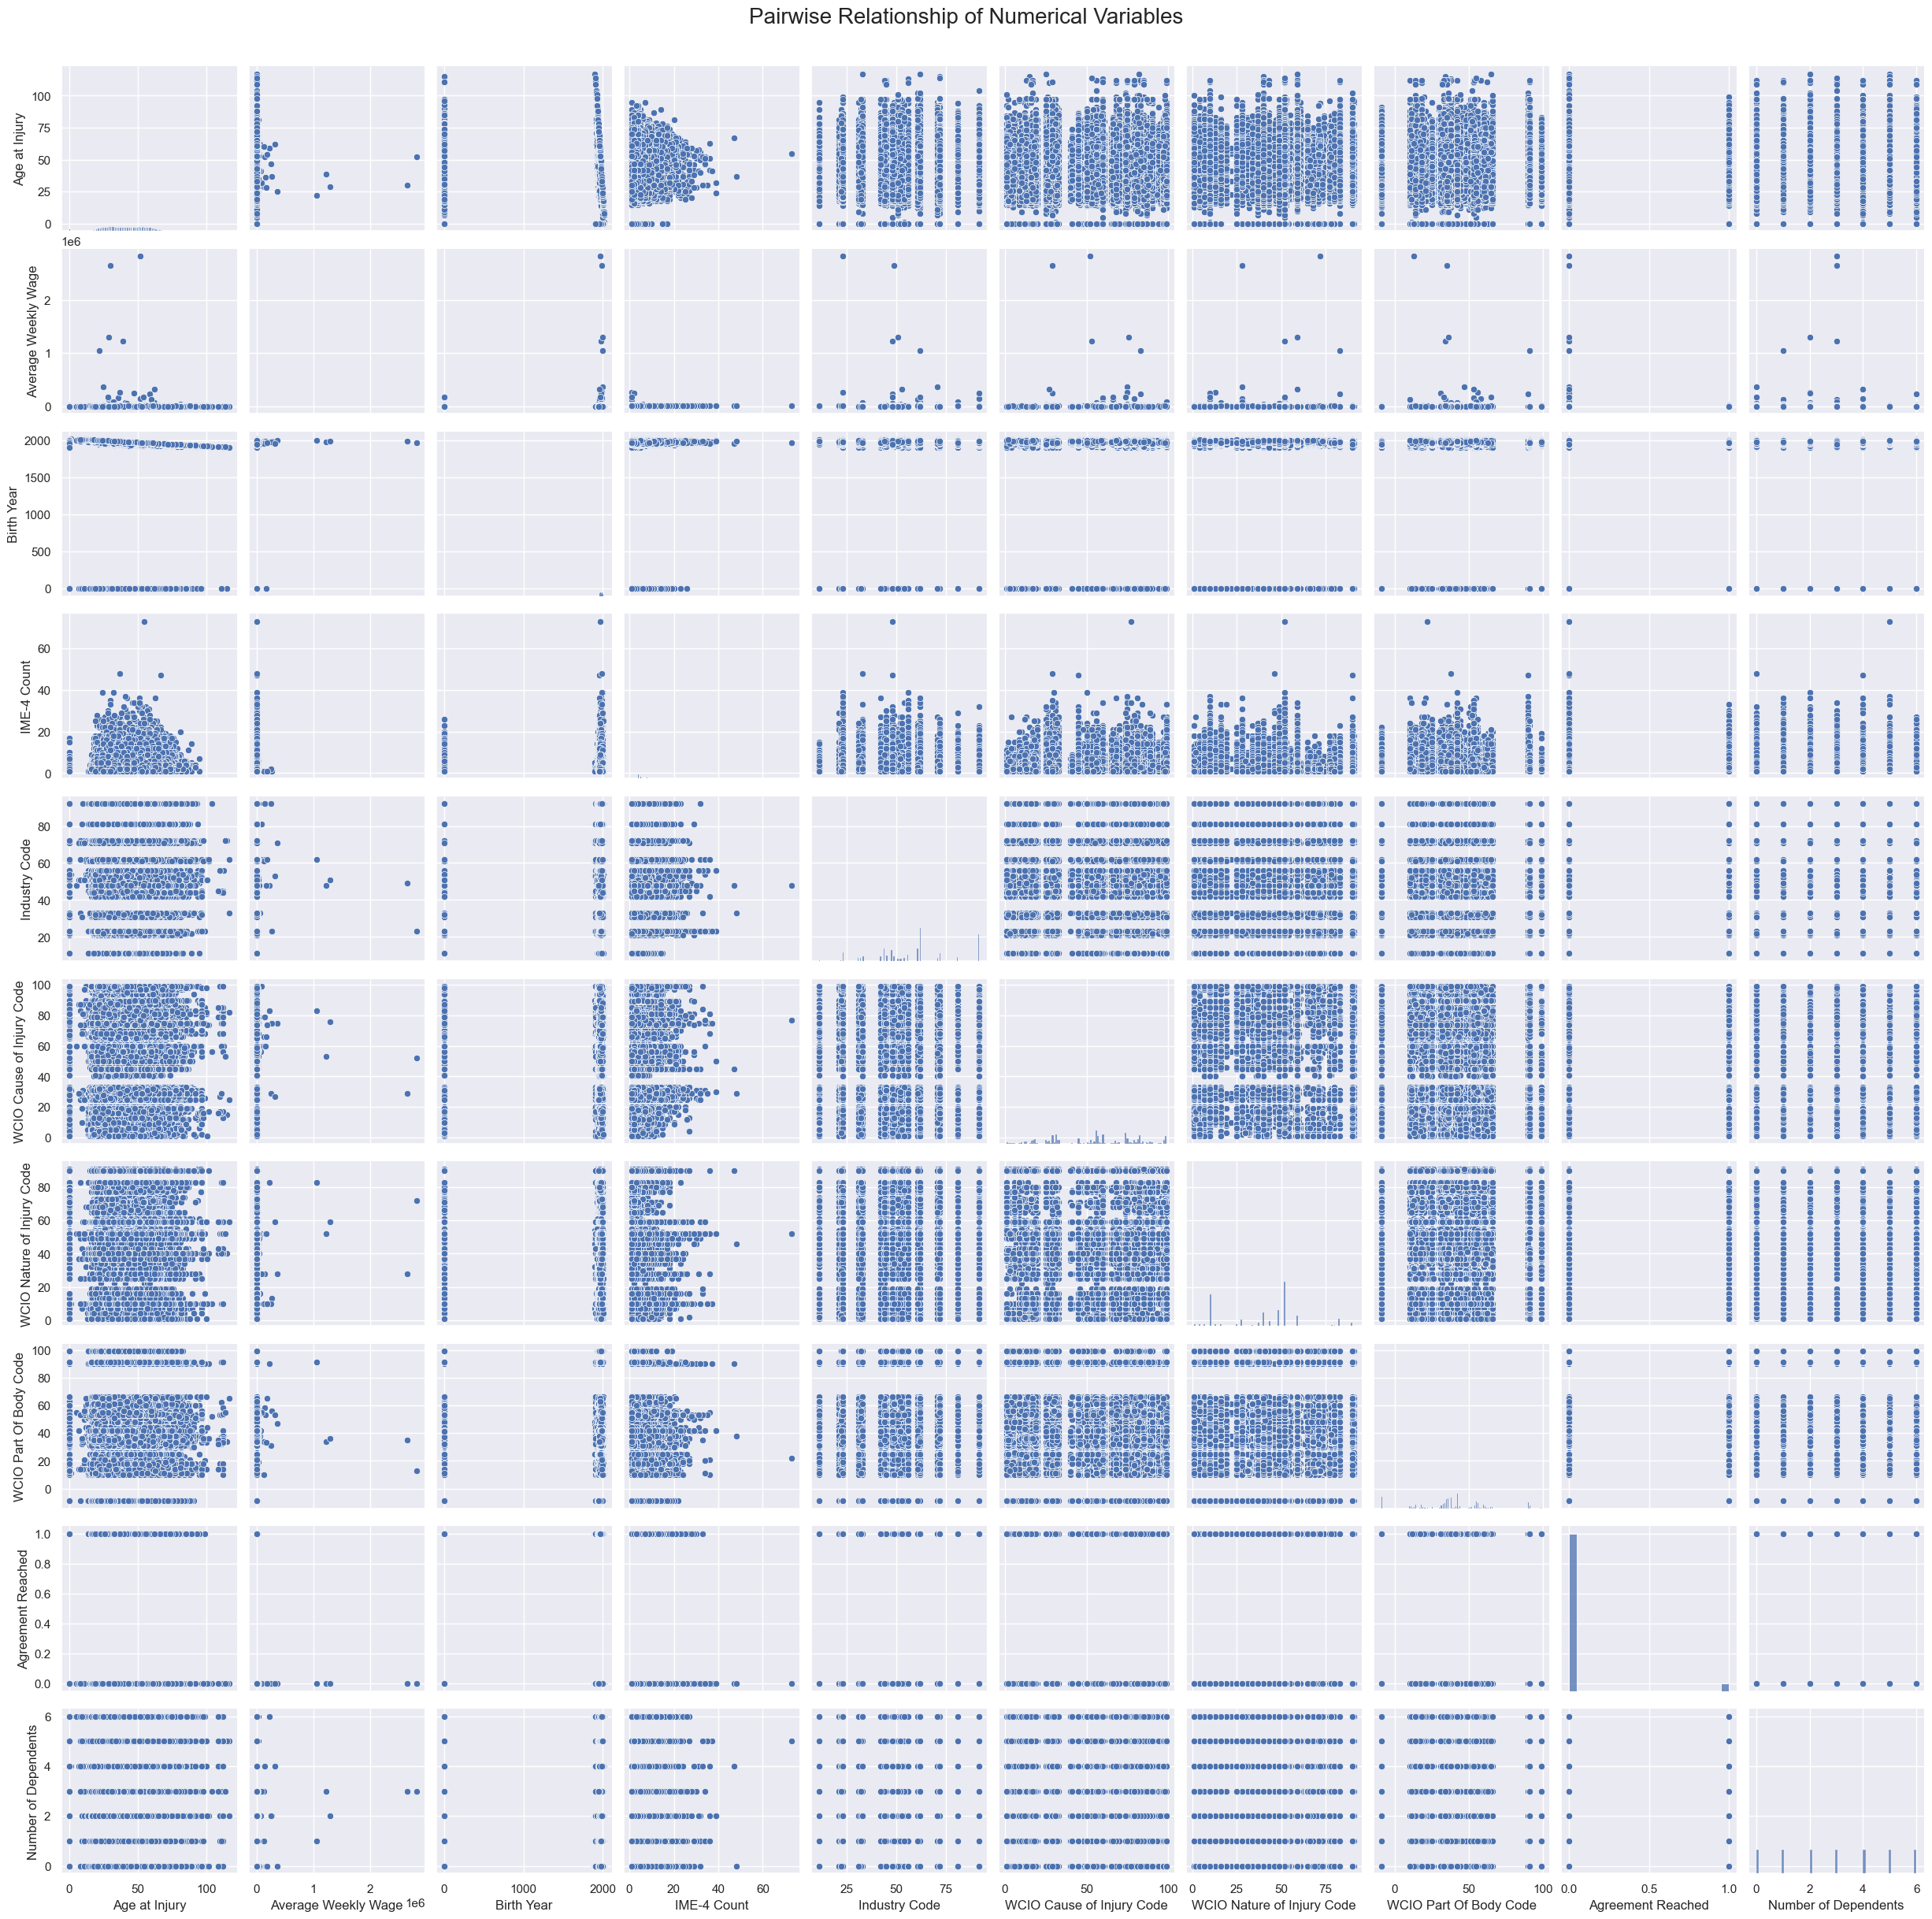

In [40]:
sns.set()

# Setting pairplot
sns.pairplot(df[numerical_col], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

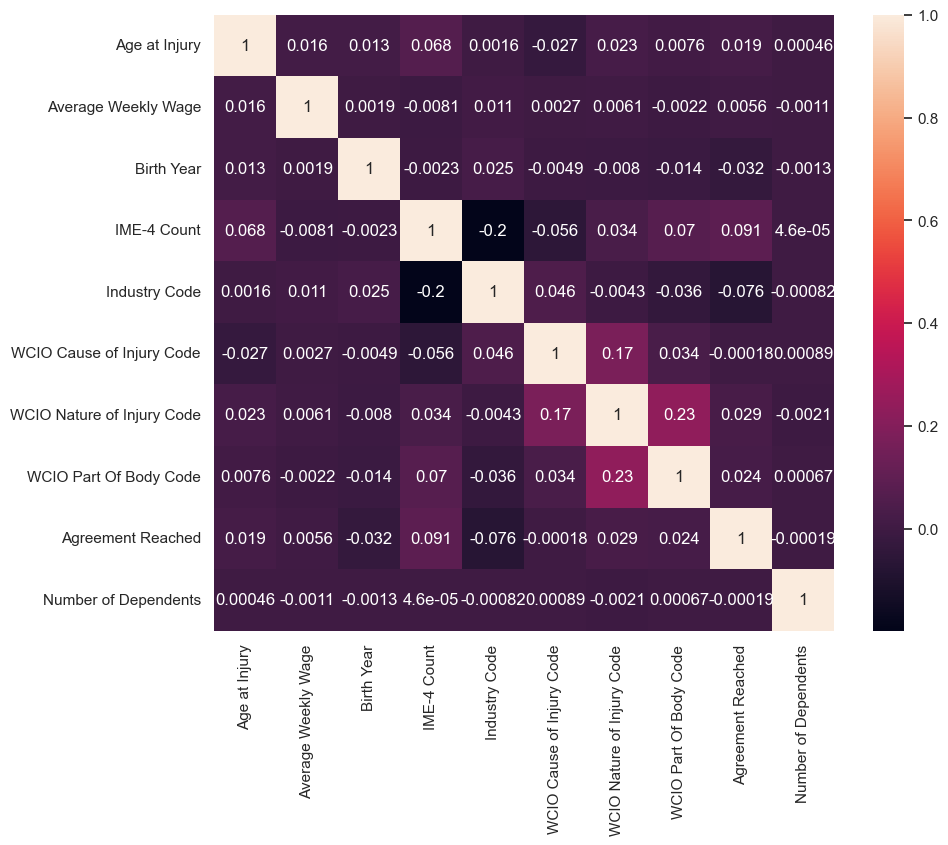

In [42]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. 
corr = df[numerical_col].corr(method="pearson")

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=True, )


plt.show()

## Categorical Variables

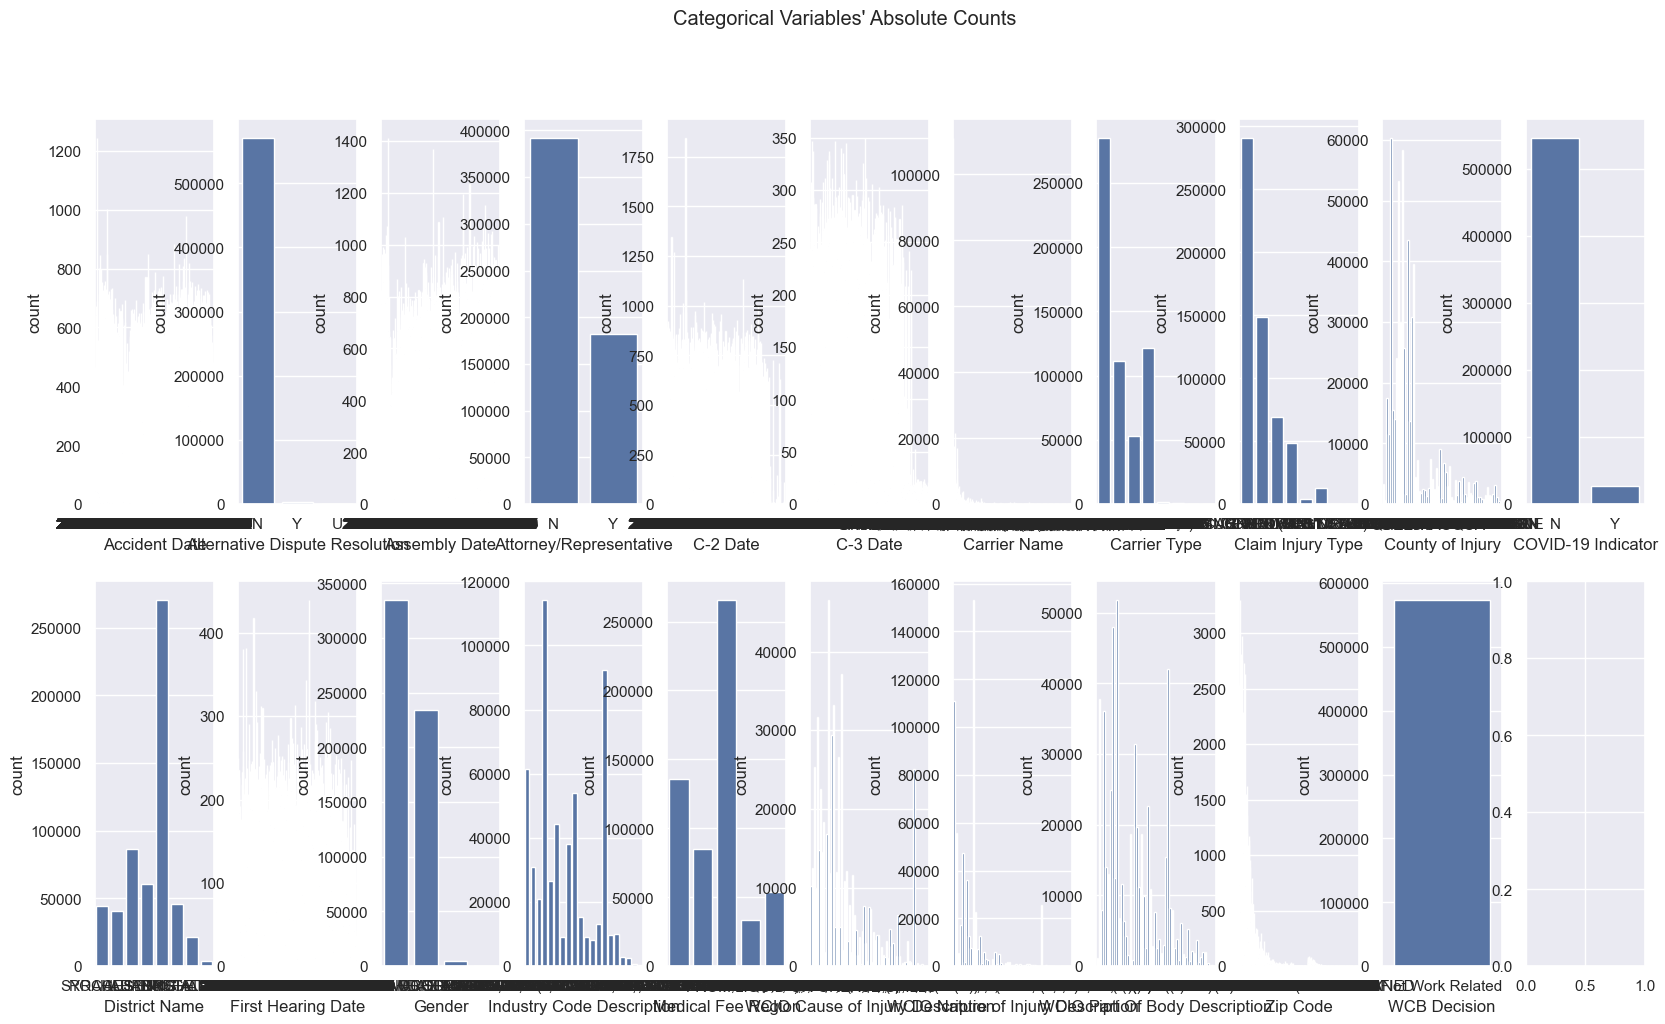

In [41]:
sns.set()

fig, axes = plt.subplots(2, ceil(len(non_numerical_col) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), non_numerical_col): 
    # What should be here?
    # pass # placeholder to avoid errors when running; remove this
    sns.countplot(x=df1[feat], ax=ax)

title = "Categorical Variables' Absolute Counts"
plt.suptitle(title)

plt.show()

In [26]:
contingency_table1 = pd.crosstab(df1['Claim Injury Type'], df1['Carrier Type'])

# Calculate the Chi-squared statistic
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.07357591926719403


In [27]:
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-squared Test Statistic: 21752.090311871914
P-value: 0.0
Degrees of Freedom: 49


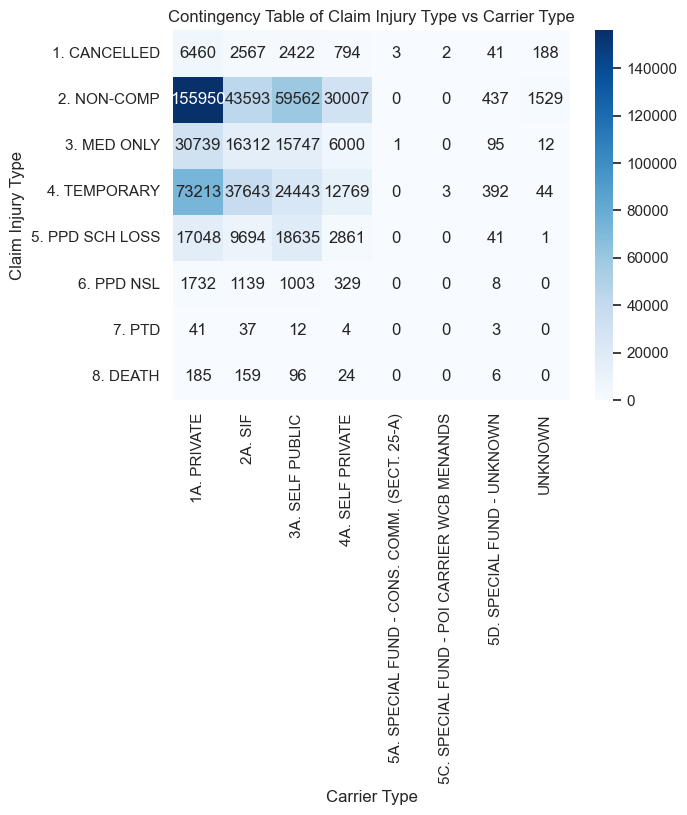

In [28]:
sns.heatmap(contingency_table1, annot=True, cmap='Blues', fmt='g')
plt.title('Contingency Table of Claim Injury Type vs Carrier Type')
plt.show()

In [31]:
contingency_table2 = pd.crosstab(df1['Claim Injury Type'], df1['County of Injury'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table2.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table2.shape) - 1)))

# Print results
print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Cramér's V: {cramers_v}")

Chi-squared Test Statistic: 21752.090311871914
P-value: 0.0
Degrees of Freedom: 49
Cramér's V: 0.07357591926719403


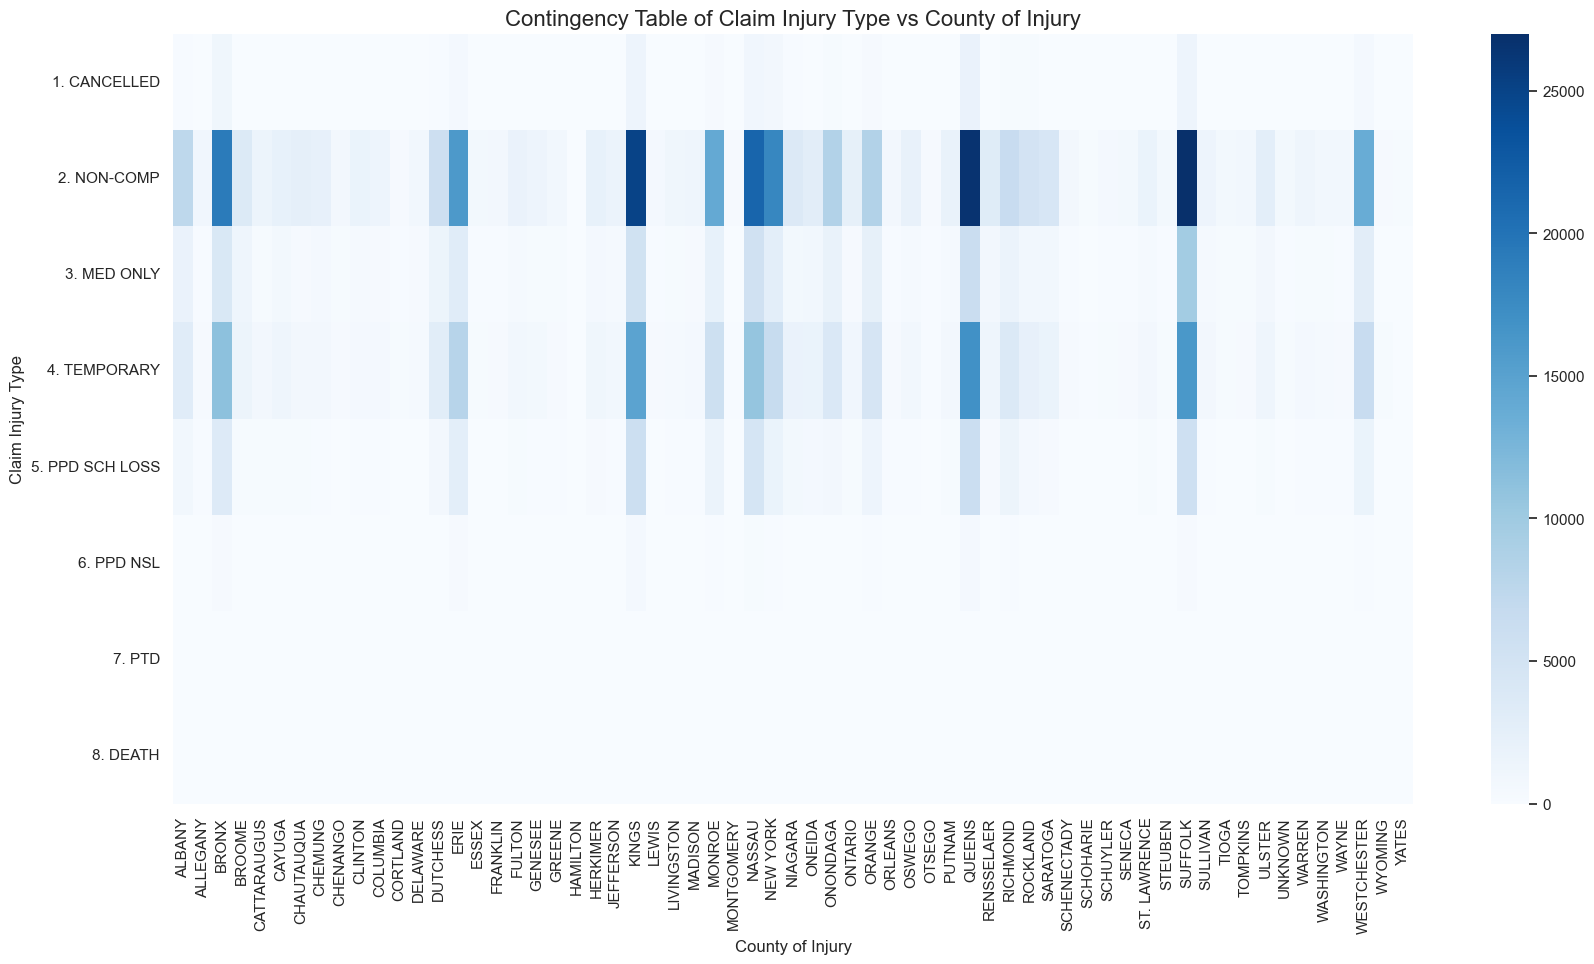

In [39]:
# Step 2: Set up the plot
plt.figure(figsize=(20, 10))  # Adjust size to fit all labels if there are many counties

# Step 3: Plot the heatmap
sns.heatmap(contingency_table2, annot=False, cmap="Blues", cbar=True)
plt.title('Contingency Table of Claim Injury Type vs County of Injury', fontsize=16)
plt.xlabel('County of Injury', fontsize=12)
plt.ylabel('Claim Injury Type', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Relative frequencies could be useful